In [1]:
import pandas as pd
from optbinning import Scorecard, BinningProcess
from optbinning import OptimalBinning

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


#Load data
data = pd.read_csv('/Users/reejungkim/Documents/Git/companies-bankruptcy-forecast/bankruptcy_Train.csv', 
                   low_memory=True)

data.head()

df = data.copy()

#Split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(
    df.loc[:, df.columns!='class'], df['class'], test_size=0.2, random_state=42)

variable = (df.loc[:,df.columns!='class']).columns.values
variable

#Instantiate class and fit to train dataset
optb = OptimalBinning(name= variable, dtype='numerical')
optb.fit(x_train, y_train)

#1) Define list of features and categorical ones
list_features = df_train.columns
list_categorical = df_train.select_dtypes(include=['object', 'category']).columns.values
#2) Instantiate BinningProcess
binning_process = BinningProcess(
    categorical_variables=list_categorical,
    variable_names=list_features)

#3) Fit and transform dataset
df_train_binned = binning_process.fit_transform(x_train, y_train)

#3) To perform the binning of a dataset
X_binned = optb.transform(x_train)


#4) To visualize the results table and plot
optb.binning_table.build()
optb.binning_table.plot(metric="woe")

#1) Define list of features and categorical ones
list_features = df_train.drop(columns=['TARGET']).columns.values
list_categorical = df_train.select_dtypes(include=['object', 'category']).columns.values


#2) Instantiate BinningProcess
binning_process = BinningProcess(
    categorical_variables=list_categorical,
    variable_names=list_features)
#3) Fit and transform dataset
df_train_binned = binning_process.fit_transform(df_train, y)

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

variable = "mean radius"
x = df[variable].values
y = data.target

In [3]:
from optbinning import OptimalBinning
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp")
optb.fit(x, y)

OptimalBinning(name='mean radius')

In [4]:
optb.status

'OPTIMAL'

In [5]:
optb.splits

array([11.42500019, 12.32999992, 13.09499979, 13.70499992, 15.04500008,
       16.92500019])

In [6]:
optb.binning_table.build()

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 11.43)",118,0.207381,3,115,0.974576,-3.12517,0.962483,0.087205
1,"[11.43, 12.33)",79,0.138840,3,76,0.962025,-2.710972,0.538763,0.052198
2,"[12.33, 13.09)",68,0.119508,7,61,0.897059,-1.643814,0.226599,0.025513
3,"[13.09, 13.70)",49,0.086116,10,39,0.795918,-0.839827,0.052131,0.006331
4,"[13.70, 15.05)",83,0.145870,28,55,0.662651,-0.153979,0.003385,0.000423
5,"[15.05, 16.93)",54,0.094903,44,10,0.185185,2.002754,0.359566,0.038678
6,"[16.93, inf)",118,0.207381,117,1,0.008475,5.283323,2.900997,0.183436
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,569,1.000000,212,357,0.627417,,5.043925,0.393784


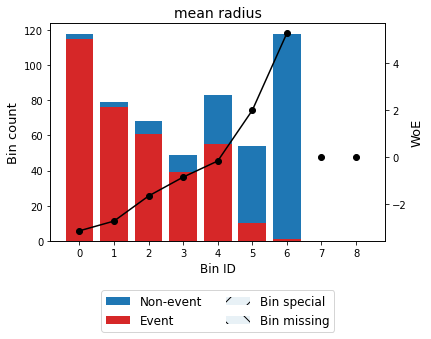

In [7]:
optb.binning_table.plot(metric="woe")

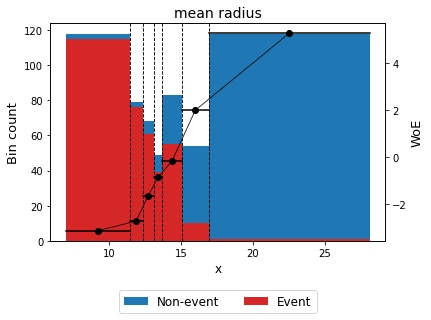

In [8]:
optb.binning_table.plot(metric="woe", style="actual", 
                        add_special=False, add_missing=False)


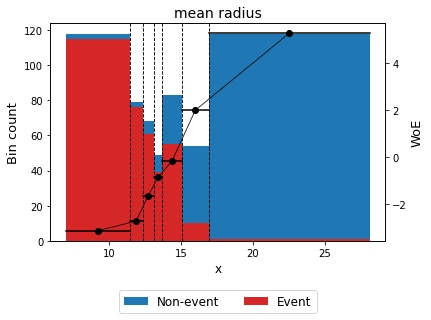

In [12]:
optb.binning_table.plot(metric="woe", style="actual", 
                        add_special=True, add_missing=True)
